In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

from pycaret.classification import *

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',20)

np.random.seed(123)

In [2]:
df = pd.read_csv("reportedheights.csv",parse_dates=['time_stamp'])

In [3]:
df

,time_stamp,sex,height
0,2014-02-09 13:40:00,Male,75
1,2014-02-09 13:46:00,Male,70
2,2014-02-09 13:59:00,Male,68
3,2014-02-09 14:51:00,Male,74
4,2014-02-09 15:16:00,Male,61
...,...,...,...
1090,2017-09-09 16:56:00,Female,69
1091,2017-03-10 21:31:00,Male,69
1092,2017-04-10 10:01:00,Male,161
1093,2017-10-14 14:07:00,Male,5'6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time_stamp  1095 non-null   datetime64[ns]
 1   sex         1095 non-null   object        
 2   height      1095 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 25.8+ KB


In [5]:
df['year'] = df['time_stamp'].dt.year

In [6]:
df['month'] = df['time_stamp'].dt.month

In [7]:
df['day'] = df['time_stamp'].dt.day

In [8]:
df

,time_stamp,sex,height,year,month,day
0,2014-02-09 13:40:00,Male,75,2014,2,9
1,2014-02-09 13:46:00,Male,70,2014,2,9
2,2014-02-09 13:59:00,Male,68,2014,2,9
3,2014-02-09 14:51:00,Male,74,2014,2,9
4,2014-02-09 15:16:00,Male,61,2014,2,9
...,...,...,...,...,...,...
1090,2017-09-09 16:56:00,Female,69,2017,9,9
1091,2017-03-10 21:31:00,Male,69,2017,3,10
1092,2017-04-10 10:01:00,Male,161,2017,4,10
1093,2017-10-14 14:07:00,Male,5'6,2017,10,14


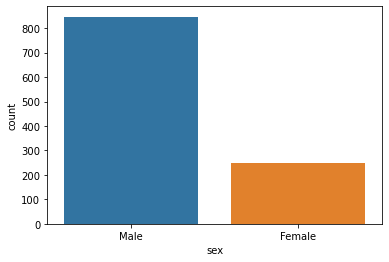

In [9]:
sns.countplot(x='sex', data=df);

### Comprehension Check: Practice with Machine Learning, Part 2

In [10]:
df2 = pd.read_csv("iris.csv")

In [11]:
df2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
df3 = df2[df2['Species'] != "setosa"]

In [13]:
df3

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
irisexp = setup(data=df3, target='Species', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"versicolor: 0, virginica: 1"
3,Original Data,"(100, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [15]:
logistic = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.000,1.0000,1.0000
2,0.8571,1.0000,0.6667,1.000,0.8000,0.6957
3,1.0000,1.0000,1.0000,1.000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.000,1.0000,1.0000
9,0.8333,0.8889,1.0000,0.750,0.8571,0.6667


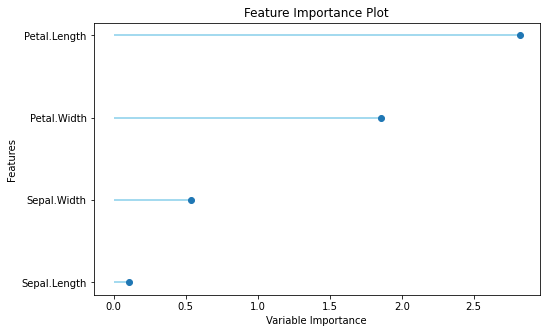

In [16]:
plot_model(logistic, plot='feature')